In [111]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_test = [train, test]


#Feature Engineering
for dataset in train_test:
    dataset.drop('Name', axis=1, inplace=True)

#Filling missing values
for dataset in train_test:
    dataset['Age'].fillna(dataset.groupby('Sex')['Age'].transform('median'), inplace=True)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'), inplace=True)


#Converting to numeric values
gender_dict = {'male':0, 'female':1}
embarked_dict = {'S':0, 'C':1, 'Q':2}
cabin_dict = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}

for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(gender_dict)
    dataset['Embarked'] = dataset['Embarked'].map(embarked_dict)    

#Filling missing values
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    dataset['Cabin'] = dataset['Cabin'].map(cabin_dict)
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train = train.drop(['PassengerId','Ticket'], axis=1)
test = test.drop('Ticket', axis=1)

train_X = train.drop('Survived', axis=1)
train_Y = train['Survived']

#train.isnull().sum()
#test.isnull().sum()


In [112]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked=True, figsize = (10,5) )

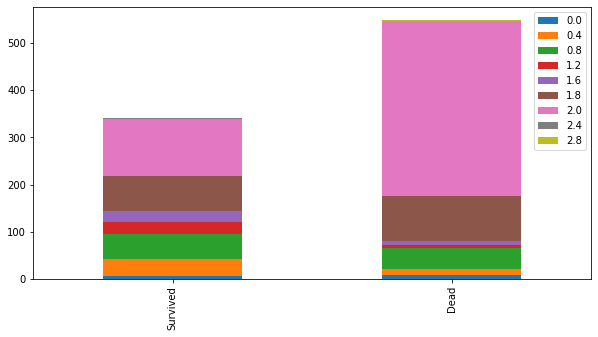

In [113]:
bar_chart('Cabin')

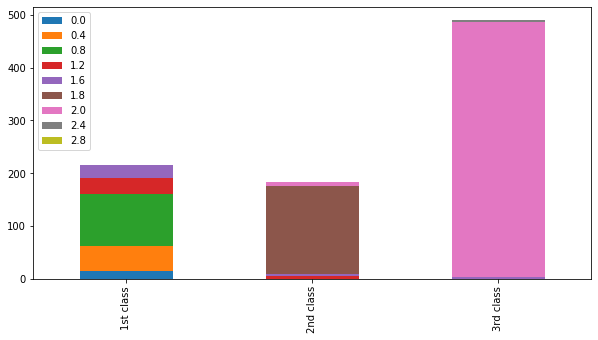

In [114]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [115]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = KNeighborsClassifier(n_neighbors=9)
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

72.73

In [116]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

78.34

In [117]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

80.25

In [118]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)


76.65

In [119]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_X, train_Y, cv=k_fold, n_jobs = 1, scoring= scoring)
#print(score)
round(np.mean(score)*100, 2)

C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lehar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

70.71

In [120]:
#Testing
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_X, train_Y)
test_X = test.drop('PassengerId', axis=1)
#print(test_X)
test_Y = clf.predict(test_X)
#print(test_Y)

submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 
                           'Survived' : test_Y
                          })
submission.to_csv('submission.csv', index=False)

submission_file = pd.read_csv('submission.csv')


In [121]:
print(submission_file)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3